In [154]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [239]:
# Imports for project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats.mstats import winsorize


In [157]:
# Dataset
path= "bank-full.csv"

dataframe = pd.read_csv((path), delimiter=';', quotechar='"')

In [158]:
print(dataframe['y'].unique())


['no' 'yes']


In [159]:
dataframe.describe() # for numerical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [160]:
# Finding all the features and categories included
for column in dataframe.columns:
    if dataframe[column].dtype == 'object' or dataframe[column].dtype == 'int64':
        print(f"Feature: {column}")
        print(f"Data Type: {dataframe[column].dtype}")
        
        if dataframe[column].dtype == 'object':  # Check for categorical features
            print(f"Categories: {dataframe[column].unique()}")
        
        print("-" * 50)


Feature: age
Data Type: int64
--------------------------------------------------
Feature: job
Data Type: object
Categories: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Feature: marital
Data Type: object
Categories: ['married' 'single' 'divorced']
--------------------------------------------------
Feature: education
Data Type: object
Categories: ['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Feature: default
Data Type: object
Categories: ['no' 'yes']
--------------------------------------------------
Feature: balance
Data Type: int64
--------------------------------------------------
Feature: housing
Data Type: object
Categories: ['yes' 'no']
--------------------------------------------------
Feature: loan
Data Type: object
Categories: ['no' 'yes']
------------------------------------

**Exploring and preparing the dataset for model implementation**

* Find Unwanted columns
* Find missing values
* Explore categorical feature
* Relation between categorical features and label
* Find continous features
* Find outliers in numerical features
* Check the balance of the dataset based on target values in classification



In [161]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [162]:
missing_values = dataframe.isnull().sum()

# Filter columns with missing values
features_na = missing_values[missing_values > 0]

# If there are missing values
if not features_na.empty:
    for feature, count in features_na.items():
        missing_percentage = np.round(count / len(df) * 100, 4)
        print(f"{feature}: {missing_percentage} % missing values")
else:
    print("No missing values")

No missing values


In [163]:
for column in dataframe.columns:
    if dataframe[column].dtype == 'object': # Check for categorical features
        num_categories = len(dataframe[column].unique()) 
        print(f"Feature: {column}")
        print(f"Number of Categories: {num_categories}")
        print("-" * 50)


Feature: job
Number of Categories: 12
--------------------------------------------------
Feature: marital
Number of Categories: 3
--------------------------------------------------
Feature: education
Number of Categories: 4
--------------------------------------------------
Feature: default
Number of Categories: 2
--------------------------------------------------
Feature: housing
Number of Categories: 2
--------------------------------------------------
Feature: loan
Number of Categories: 2
--------------------------------------------------
Feature: contact
Number of Categories: 3
--------------------------------------------------
Feature: month
Number of Categories: 12
--------------------------------------------------
Feature: poutcome
Number of Categories: 4
--------------------------------------------------
Feature: y
Number of Categories: 2
--------------------------------------------------


In [164]:
conti_feat = [column for column in dataframe.columns if dataframe[column].dtype in ['int64', 'float64']]

# Print the conti_featnuous features
print("Continuous Features:")
for feature in conti_feat:
    print(feature)

Continuous Features:
age
balance
day
duration
campaign
pdays
previous


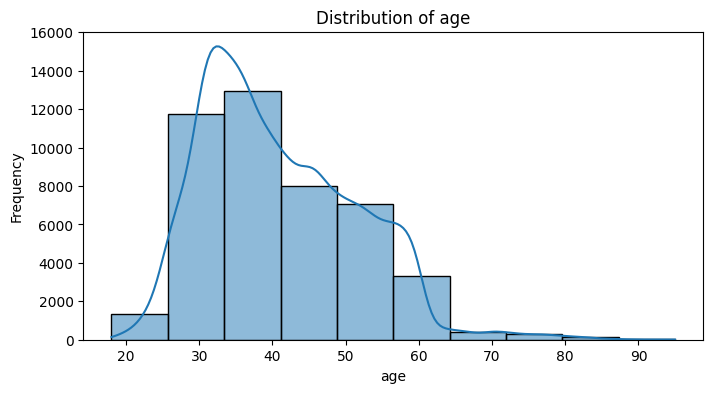

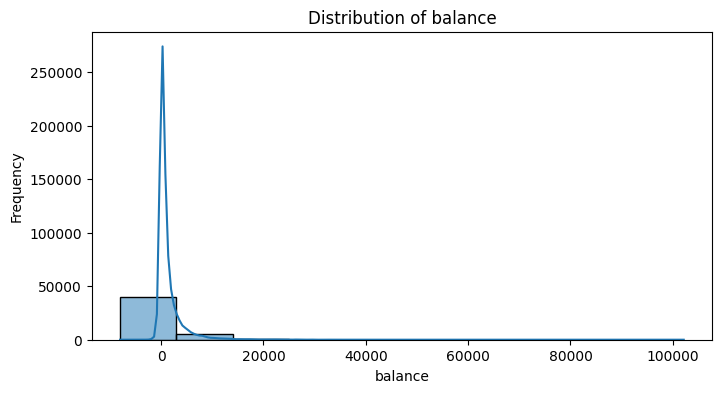

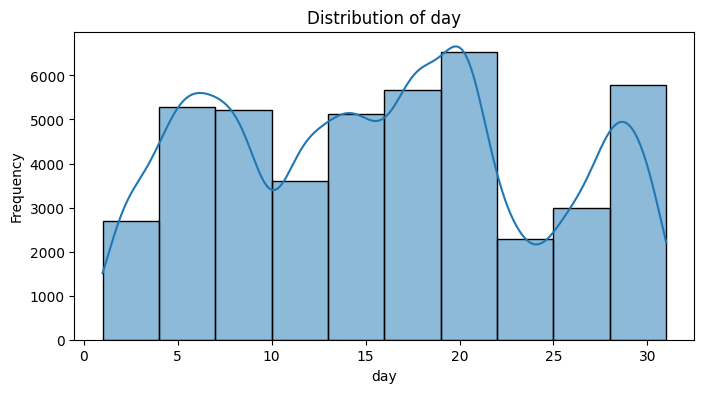

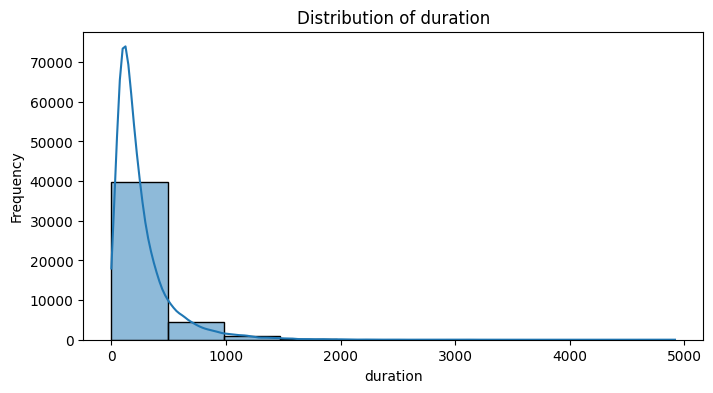

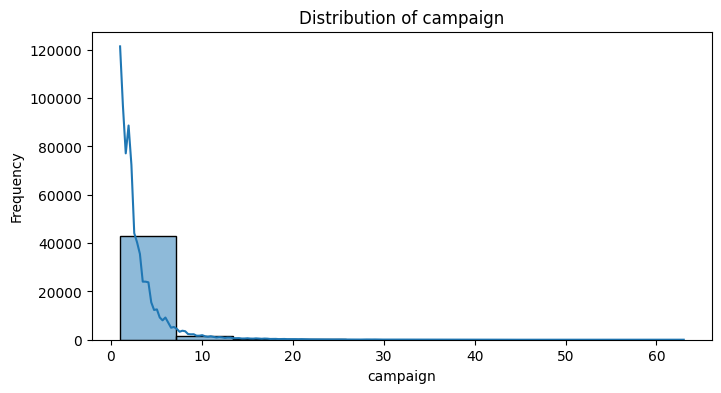

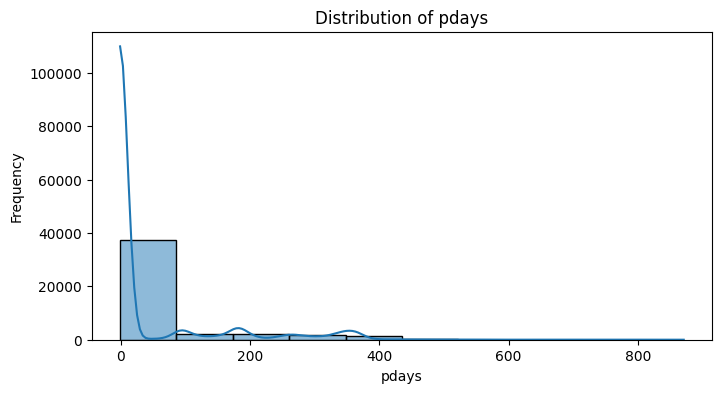

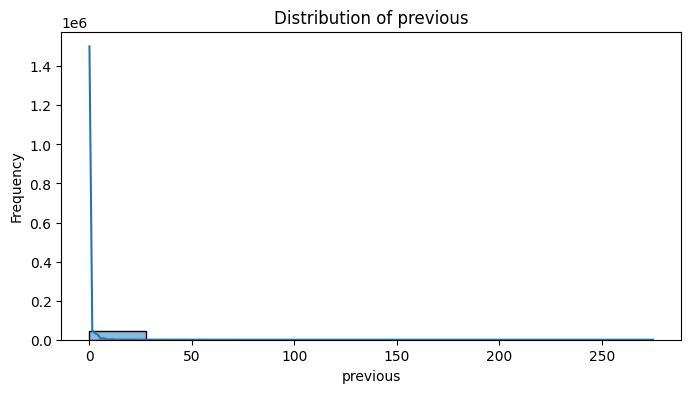

In [165]:
# plot to see spread of data
for feature in conti_feat:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataframe[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

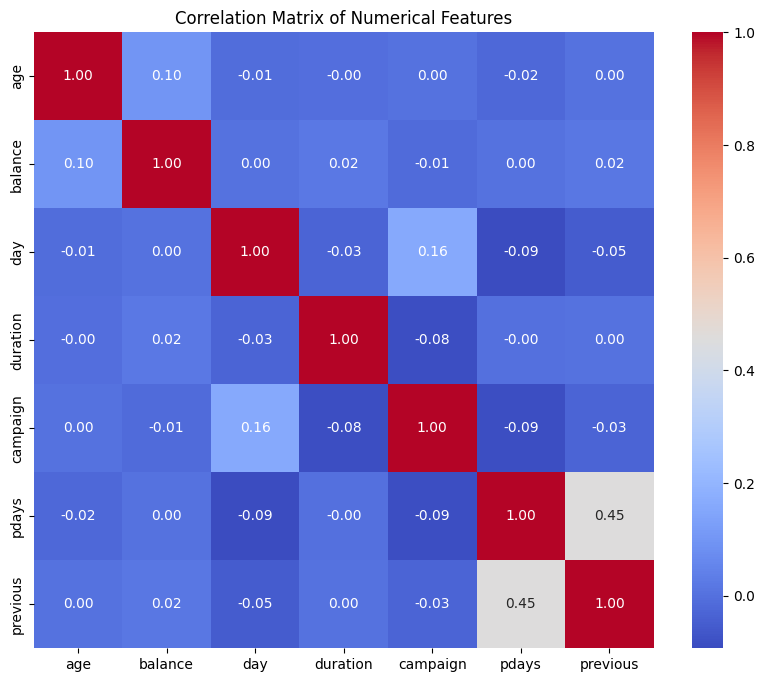

In [166]:
plt.figure(figsize=(10, 8))
corr_mat = dataframe[conti_feat].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

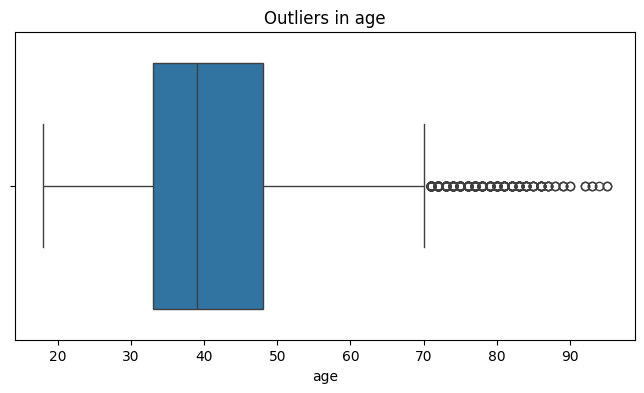

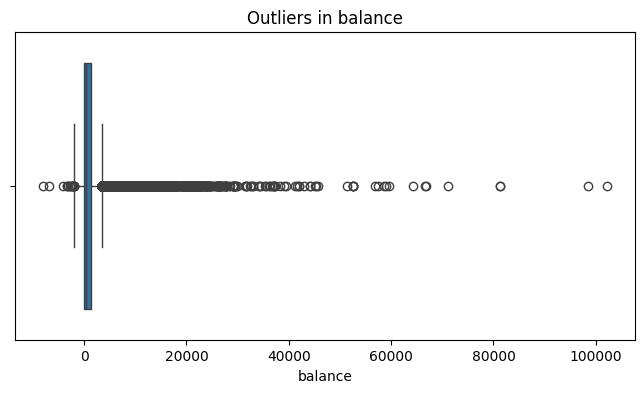

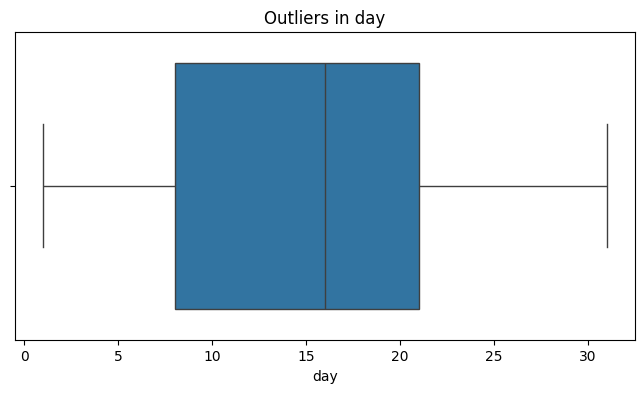

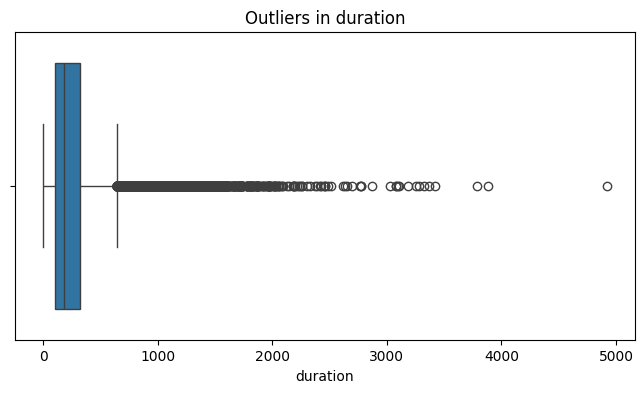

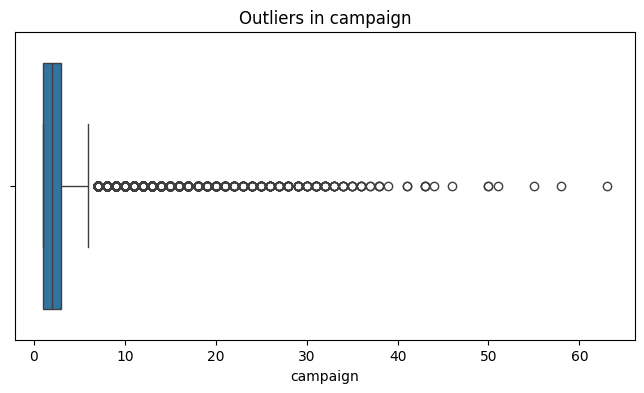

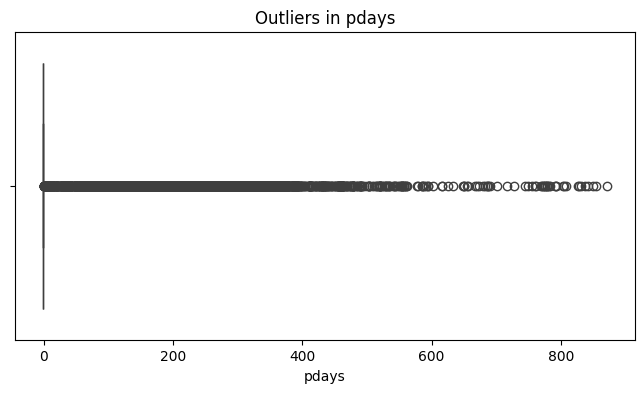

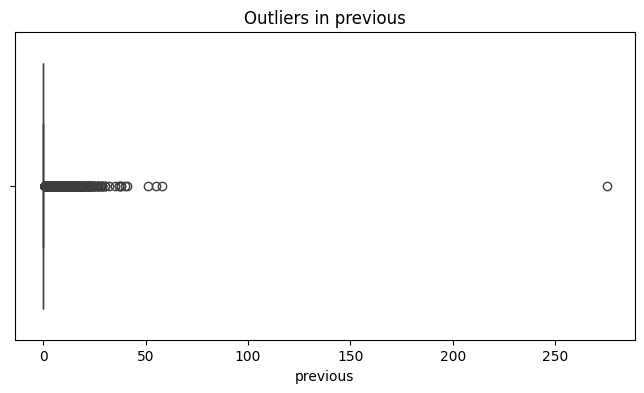

In [167]:
for feature in conti_feat:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataframe[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

The data set consists of: 

9 categorical features
no missing values
outliers within dataset in numerical (continuous features); age, balance, duration, pdays, previous campaign


Problem statement: Classification problem, where two models (random forest and CNN) must be trained to predict if a client will subscribe a term deposit based on the data. 

Feature engineering: 

Feature Selection: Remove irrelevant/redundant features.

Feature Transformation: Normalize/standardize numerical features.

Encoding Categorical Variables:

One-hot encoding for nominal categories.
Label encoding for ordinal categories.

Split Data:

Split the dataset into:
Training set
Validation set ( for hyperparameter tuning).
Test set


In [215]:
# Duplicate dataset to trim and prepare for model implementation

df = dataframe.copy()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [216]:
df.shape

(45211, 17)

trimming the unwanted features in a dataset requires attention to the range of values affecting it via features.

In [170]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

The target feature being "y" for the problem. grouping by the other features allows us to understand the size of the feature affecting. This process will be repeated for other features as well.

In [171]:
df.drop(['default'],axis=1,inplace=True)

To accurately classify whether a customer would infact use the services, attributes that prove highly correlated and redundant should be trimmed as well. Duration is one such feature.

In [217]:
df.drop(['duration'],axis=1,inplace=True)

Removing outliers within the data will result in a massive information loss. 

Winsorizing is a technique that replaces the extreme values of a dataset with data points that are more feasible for a model to process. The most common usage being the 95th and 5th percentile. 

In [257]:
def winsorizing(df, columns):
    for column in columns:
        if column in df.select_dtypes(include=['float64', 'int64']).columns:
            # Apply Winsorizing
            df[column] = winsorize(df[column], limits=(0.05, 0.05))
            print(f"{column} has had the outliers handled")
    return df

# features to be handled
features_to_winsorize = ['age', 'balance', 'campaign', 'day', 'pdays', 'previous']


data_cleaned = winsorizing(df.copy(), features_to_winsorize)



age has had the outliers handled
balance has had the outliers handled
campaign has had the outliers handled
day has had the outliers handled
pdays has had the outliers handled
previous has had the outliers handled


In [241]:
cleaned_numerical = [column for column in data_cleaned.columns if data_cleaned[column].dtype in ['int64', 'float64']]
print(cleaned_numerical)


['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


In [242]:
print(data_cleaned.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  campaign  pdays  previous poutcome   y  
0  unknown    5   may         1     -1         0  unknown  no  
1  unknown    5   may         1     -1         0  unknown  no  
2  unknown    5   may         1     -1         0  unknown  no  
3  unknown    5   may         1     -1         0  unknown  no  
4  unknown    5   may         1     -1         0  unknown  no  


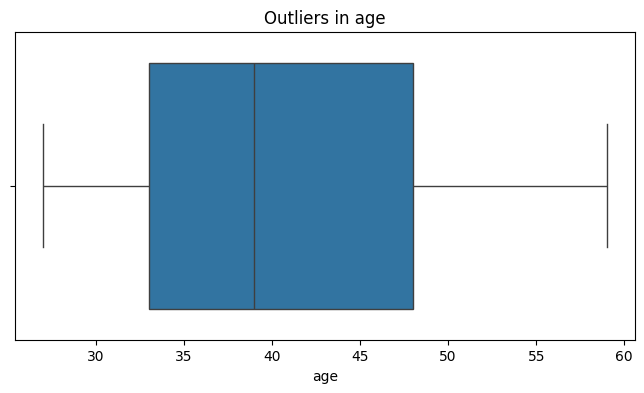

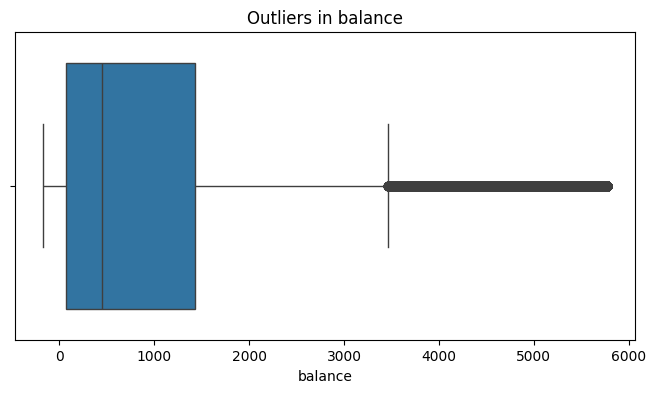

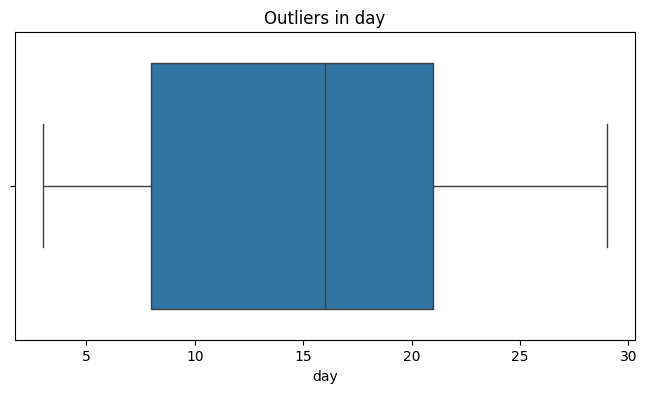

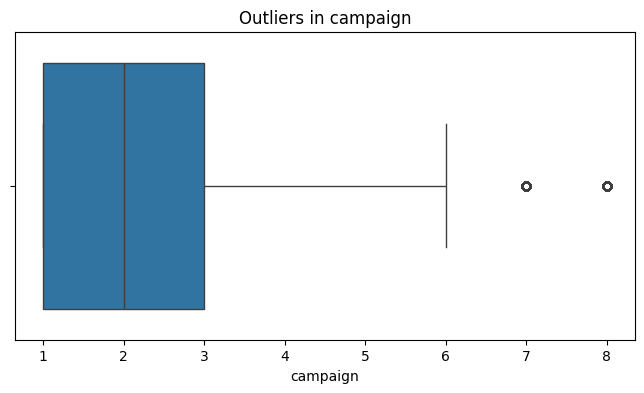

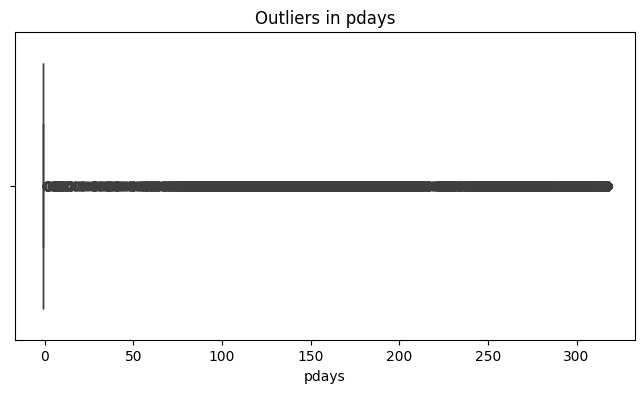

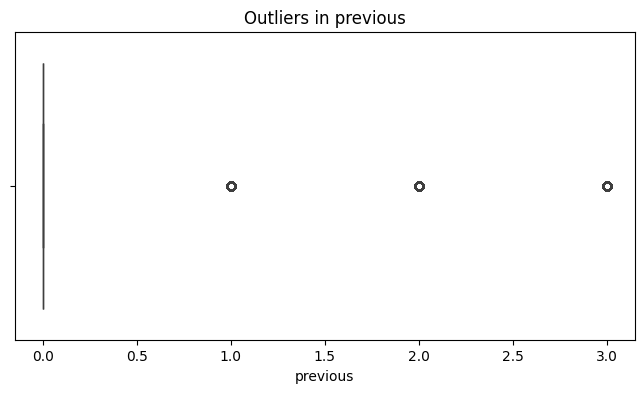

In [258]:
for feature in cleaned_numerical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_cleaned[feature])
    plt.title(f'Outliers in {feature}')
    plt.xlabel(feature)
    plt.show()

Random forest implementation

In [244]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

df_final = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=False)

In [245]:
df_final = df_final.astype(int)
print(df_final['y_no'].unique())
print(df_final['y_yes'].unique())


[1 0]
[0 1]


In [246]:
df_final['y'] = df_final['y_yes']  # Use as the target (1 for yes, 0 for no)
df_final = df_final.drop(['y_no', 'y_yes'], axis=1)  
# Define features and target
X = df_final.drop('y', axis=1)
y = df_final['y']

In [247]:
df_final.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,1,-1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,1,-1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [249]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (31647, 50)
Shape of X_test: (13564, 50)
Shape of y_train: (31647,)
Shape of y_test: (13564,)


In [250]:
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train_smote, y_train_smote)

# Train the model
rf_model1.fit(X_train_res, y_train_res)

# Make predictions
yrf_pred = rf_model1.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, yrf_pred))

print("\nClassification Report:")
print(classification_report(y_test, yrf_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, yrf_pred))

# Out-of-Bag score
print("OOB Score:", rf_model1.oob_score_)

Confusion Matrix:
[[11664   313]
 [ 1158   429]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11977
           1       0.58      0.27      0.37      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564


Accuracy Score:
0.8915511648481274
OOB Score: 0.9373054213633923


In [251]:
n_estimators_list = [50, 100, 200, 300]

# Lists to store metrics
train_scores = []
test_scores = []
oob_scores = []

for estim in n_estimators_list:
    # Create RandomForestClassifier with specified number of trees
    rf_model = RandomForestClassifier(
        n_estimators=estim,
        random_state=42,
        oob_score=True
    )
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Get scores
    train_score = rf_model.score(X_train, y_train)
    test_score = rf_model.score(X_test, y_test)
    oob_score = rf_model.oob_score_
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    oob_scores.append(oob_score)
    
    print(f"\nNumber of trees: {estim}")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"OOB Score: {oob_score:.4f}")
    print("Classification Report:")
    y_pred = rf_model.predict(X_test)
    print(classification_report(y_test, y_pred))


Number of trees: 50
Training Score: 0.9990
Testing Score: 0.8956
OOB Score: 0.8897
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.64      0.24      0.35      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.61      0.65     13564
weighted avg       0.88      0.90      0.87     13564


Number of trees: 100
Training Score: 0.9998
Testing Score: 0.8957
OOB Score: 0.8907
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.64      0.24      0.35      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.61      0.65     13564
weighted avg       0.88      0.90      0.87     13564


Number of trees: 200
Training Score: 0.9999
Testing Score: 0.8964
OOB Score: 0.8907
Classification Report:
              precision

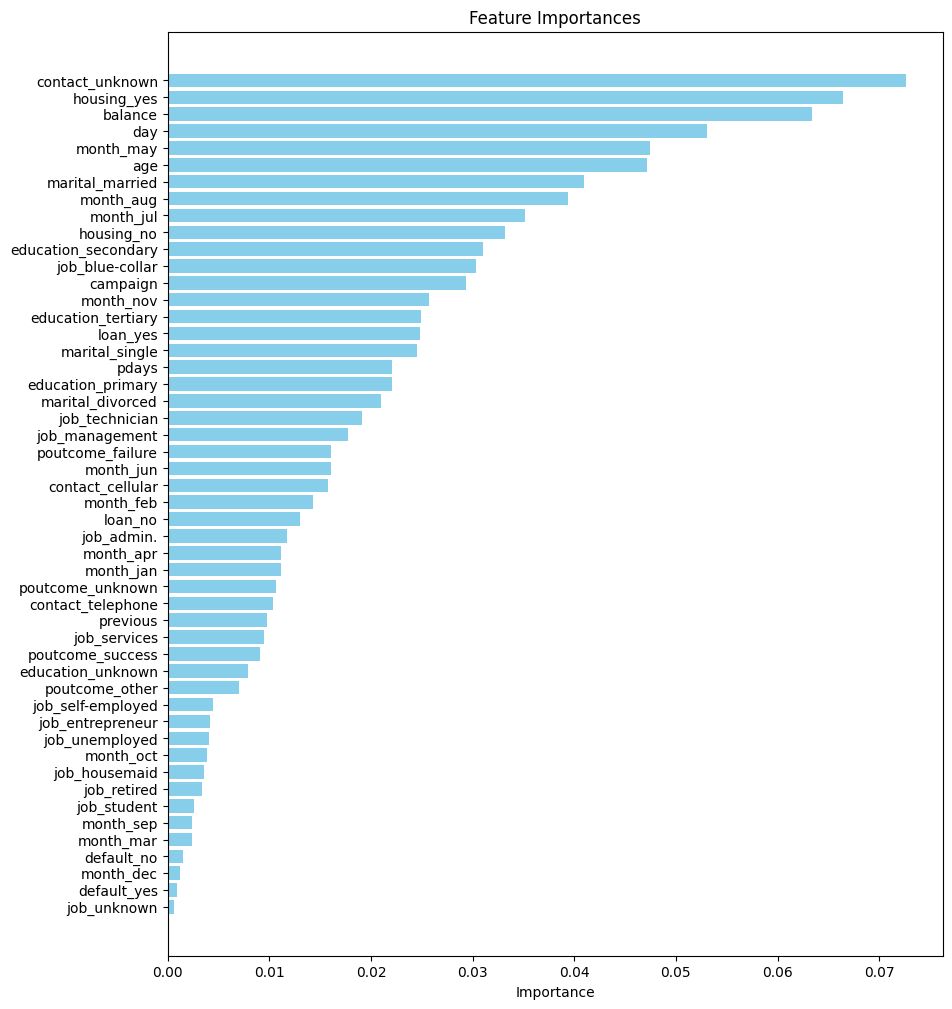

In [252]:
feature_importances = rf_model1.feature_importances_

# Create a DataFrame to display feature importances
feature_names = X_train.columns  
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

In [253]:
print("\nF1 Score (Weighted Average):")
print(f1_score(y_test, y_pred, average='weighted'))


F1 Score (Weighted Average):
0.874035036565527


In [254]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')  # Or 'weighted'
print (precision)

0.8760742073729558


In [255]:
# Check the balance of the resampled data after SMOTE
print(y_train_smote.value_counts())

# check the normalized distribution after SMOTE
print(y_train_smote.value_counts(normalize=True))

y
0    27945
1    27945
Name: count, dtype: int64
y
0    0.5
1    0.5
Name: proportion, dtype: float64


In [256]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

# Build the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Metrics
print("The NN model's Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nThe NN model's Classification Report:")
print(classification_report(y_test, y_pred))

print("\nThe NN model'sAccuracy Score:")
print(accuracy_score(y_test, y_pred))

c:\Users\msmam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8905 - loss: 0.2798 - val_accuracy: 0.8917 - val_loss: 0.2982
Epoch 2/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9358 - loss: 0.1806 - val_accuracy: 0.8913 - val_loss: 0.2945
Epoch 3/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.1749 - val_accuracy: 0.8947 - val_loss: 0.2939
Epoch 4/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9362 - loss: 0.1736 - val_accuracy: 0.8953 - val_loss: 0.2930
Epoch 5/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9394 - loss: 0.1691 - val_accuracy: 0.8936 - val_loss: 0.2951
Epoch 6/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9359 - loss: 0.1744 - val_accuracy: 0.8938 - val_loss: 0.2930
Epoch 7/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9380 - loss: 0.1704 - val_accuracy: 0.8959 - val_loss: 0.2894
Epoch 8/20
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9384 - loss: 0.1689 - 